In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

matplotlib.rcParams["axes.formatter.limits"] = (-4,4)
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["font.family"] = 'sans-serif'

In [2]:

angles = [45, 90, 135] # data used
angle_value = 45 # angle to predict
data_path_plt = Path("../data_extension_v")
fig_format = 'webp'
dpi = 200

if len(angles) == 3:
    suffix = data_path_plt.stem[-1]
else:
    suffix = data_path_plt.stem[-1]
    for i in angles:
        suffix = suffix + '_' + str(i)

input_xy_exp_plt = []
data_exp_plt = []
for file_load_angle, file_ext in zip( sorted(data_path_plt.glob("input_load_angle_exp_*")),
                             sorted(data_path_plt.glob("data_extension_exp_*")) ):
    load_angle = np.loadtxt(file_load_angle, delimiter=",")
    if np.abs(load_angle[0,1] - np.deg2rad(angle_value)) < 1e-6:
        input_xy_exp_plt.append(load_angle)
        data_exp_plt.append(np.loadtxt(file_ext, delimiter=",").mean(axis=1))

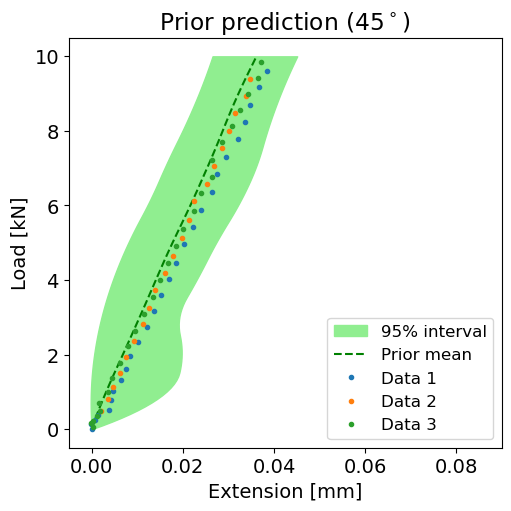

In [3]:
# Prior plot
df_prior = pd.read_csv("prior_prediction_"+str(angle_value)+"deg_linear_"+suffix+".csv")

fig_prior, ax_prior = plt.subplots(figsize=(5,5), layout='constrained')

# plot 95% confidence level of predictions
ax_prior.fill_betweenx(df_prior["samples_load"], df_prior["percentiles_prior_l"], df_prior["percentiles_prior_u"], color="lightgreen", label='95% interval')
# plot mean prediction
ax_prior.plot(df_prior["mean_prediction_prior"], df_prior["samples_load"], "green", ls="dashed", lw=1.5, label='Prior mean')
# plot data
sz = 3
for i in range(len(input_xy_exp_plt)):
    ax_prior.plot(data_exp_plt[i], input_xy_exp_plt[i][:,0], "o", markersize=sz, label='Data '+str(i+1))

ax_prior.set(xlabel="Extension [mm]", ylabel="Load [kN]", title="Prior prediction ($" + str(angle_value) + "^\circ$)")
ax_prior.legend(fontsize=12, loc="lower right")

if angle_value == 45:
    ax_prior.set_xlim(-0.005, 0.09)
if angle_value == 90: #and data_path_plt.stem[-1] == 'v':
    ax_prior.set_xlim([-0.02, 0.125])
if angle_value == 135:
    ax_prior.set_xlim(-0.055, 0.09)
# if 'linear' in file_path.name:
#     fig_prior.savefig("prior_prediction_"+str(angle_value)+"deg_linear_" + suffix + ".svg")
# elif 'const' in file_path.name:
#     fig_prior.savefig("prior_prediction_"+str(angle_value)+"deg_const_" + suffix + ".svg")
fig_prior.savefig("prior_prediction_"+str(angle_value)+"deg_linear_" + suffix + '.' + fig_format, dpi=dpi, transparent=True)

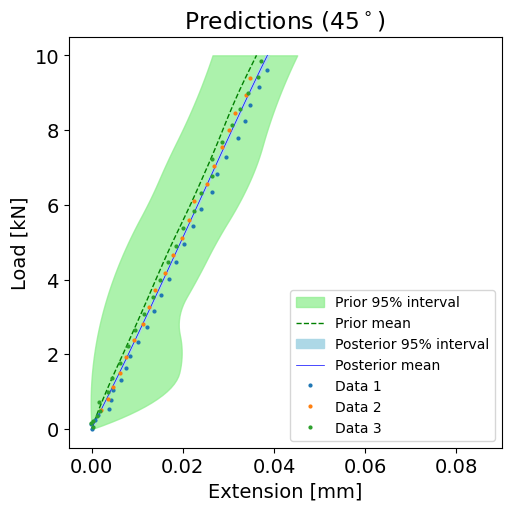

In [14]:
# Posterior plot
df_post = pd.read_csv("post_prediction_"+str(angle_value)+"deg_linear_"+suffix+".csv")

fig_all, ax_all = plt.subplots(figsize=(5,5), layout='constrained')

ax_all.fill_betweenx(df_prior["samples_load"], df_prior["percentiles_prior_l"], df_prior["percentiles_prior_u"], alpha=0.75, color="lightgreen", label='Prior 95% interval')
ax_all.plot(df_prior["mean_prediction_prior"], df_prior["samples_load"], c="green", ls="dashed", lw=1., label='Prior mean')

ax_all.fill_betweenx(df_post["samples_load"], df_post["percentiles_post_l"], df_post["percentiles_post_u"], alpha=1, color="lightblue", label="Posterior 95% interval")
ax_all.plot(df_post["mean_prediction_post"], df_post["samples_load"], c="blue", ls="solid", lw=0.5, label="Posterior mean")

sz=2
for i in range(len(input_xy_exp_plt)):
    ax_all.plot(data_exp_plt[i], input_xy_exp_plt[i][:,0], "o", markersize=sz, label='Data '+str(i+1))

ax_all.set(xlabel="Extension [mm]", ylabel="Load [kN]", title="Predictions ($" + str(angle_value) + "^\circ$)")
ax_all.legend(fontsize=10 , loc="lower right")

if angle_value == 45:
    ax_all.set_xlim(-0.005, 0.09)
if angle_value == 90: #and data_path_plt.stem[-1] == 'v':
    ax_all.set_xlim([-0.02, 0.125])
if angle_value == 135:
    ax_all.set_xlim(-0.055, 0.09)
# if 'linear' in file_path.name:
#     fig_all.savefig("prediction_"+str(angle_value)+"deg_linear_" + suffix + ".svg")
# elif 'const' in file_path.name:
#     fig_all.savefig("prediction_"+str(angle_value)+"deg_const_" + suffix + ".svg")
fig_all.savefig("prediction_"+str(angle_value)+"deg_linear_" + suffix + '.' + fig_format, dpi=dpi, transparent=True)

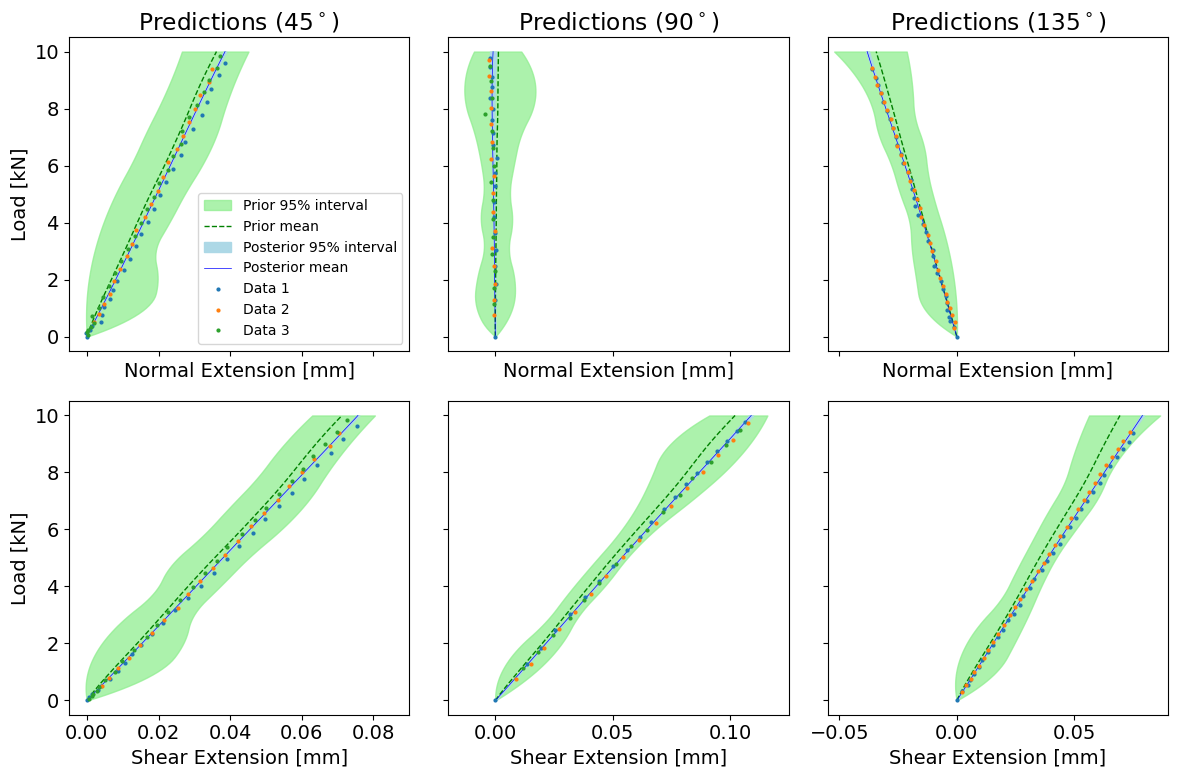

In [20]:
angles = [45, 90, 135] # data used
angle_values = [45, 90, 135] # angle to predict
data_path_plts = [Path("../data_extension_v"), Path("../data_extension_h")]
fig_format = 'webp'
dpi = 200

fig_total, ax_total = plt.subplots(nrows=2, ncols=3, figsize=(3*4,2*4), layout='tight', sharex='col', sharey='row')

for ind_a, angle_value in enumerate(angle_values):
    for ind_d, data_path_plt in enumerate(data_path_plts):
        if len(angles) == 3:
            suffix = data_path_plt.stem[-1]
        else:
            suffix = data_path_plt.stem[-1]
            for i in angles:
                suffix = suffix + '_' + str(i)

        input_xy_exp_plt = []
        data_exp_plt = []
        for file_load_angle, file_ext in zip( sorted(data_path_plt.glob("input_load_angle_exp_*")),
                                    sorted(data_path_plt.glob("data_extension_exp_*")) ):
            load_angle = np.loadtxt(file_load_angle, delimiter=",")
            if np.abs(load_angle[0,1] - np.deg2rad(angle_value)) < 1e-6:
                input_xy_exp_plt.append(load_angle)
                data_exp_plt.append(np.loadtxt(file_ext, delimiter=",").mean(axis=1))

        df_prior = pd.read_csv("prior_prediction_"+str(angle_value)+"deg_linear_"+suffix+".csv")
        df_post = pd.read_csv("post_prediction_"+str(angle_value)+"deg_linear_"+suffix+".csv")

        ax_total[ind_d, ind_a].fill_betweenx(df_prior["samples_load"], df_prior["percentiles_prior_l"], df_prior["percentiles_prior_u"], 
                                             alpha=0.75, color="lightgreen", label='Prior 95% interval')
        ax_total[ind_d, ind_a].plot(df_prior["mean_prediction_prior"], df_prior["samples_load"], c="green", ls="dashed", lw=1., label='Prior mean')

        ax_total[ind_d, ind_a].fill_betweenx(df_post["samples_load"], df_post["percentiles_post_l"], df_post["percentiles_post_u"], 
                                             alpha=1, color="lightblue", label="Posterior 95% interval")
        ax_total[ind_d, ind_a].plot(df_post["mean_prediction_post"], df_post["samples_load"], c="blue", ls="solid", lw=0.5, label="Posterior mean")

        sz=2
        for i in range(len(input_xy_exp_plt)):
            ax_total[ind_d, ind_a].plot(data_exp_plt[i], input_xy_exp_plt[i][:,0], "o", markersize=sz, label='Data '+str(i+1))

        if ind_d == 0:
            if ind_a == 0:
                ax_total[ind_d, ind_a].set(xlabel="Normal Extension [mm]", ylabel="Load [kN]", title="Predictions ($" + str(angle_value) + "^\circ$)")
            else:
                ax_total[ind_d, ind_a].set(xlabel="Normal Extension [mm]", title="Predictions ($" + str(angle_value) + "^\circ$)")
        elif ind_d == 1:
            if ind_a == 0:
                ax_total[ind_d, ind_a].set(xlabel="Shear Extension [mm]", ylabel="Load [kN]")
            else:
                ax_total[ind_d, ind_a].set(xlabel="Shear Extension [mm]")
        if (ind_d == 0) and (ind_a == 0):
            ax_total[ind_d, ind_a].legend(fontsize=10, loc="lower right")
        if angle_value == 45:
            ax_total[ind_d, ind_a].set_xlim(-0.005, 0.09)
        if angle_value == 90: #and data_path_plt.stem[-1] == 'v':
            ax_total[ind_d, ind_a].set_xlim([-0.02, 0.125])
        if angle_value == 135:
            ax_total[ind_d, ind_a].set_xlim(-0.055, 0.09)

fig_total.savefig("prediction_linear" + suffix[1:] + "." + fig_format, dpi=dpi, transparent=True)
# fig_total.savefig("prior_prediction_linear" + suffix[1:] + "." + fig_format, dpi=dpi, transparent=True)